In [5]:
from MFEA_lib.model import SMP_MFEA
from MFEA_lib.model.utils import *
from MFEA_lib.operators.Crossover import *
from MFEA_lib.operators.Mutation import *
from MFEA_lib.operators.Selection import *
from MFEA_lib.operators.Search import *
from MFEA_lib.tasks.Benchmark.Funcs import CEC17_benchmark, GECCO20_benchmark_50tasks, WCCI22_benchmark


#### Benchmark

In [6]:
ls_benchmark = []
ls_IndClass = []

for i in range(4, 11, 1):
    t, ic = WCCI22_benchmark.get_complex_benchmark(i)
    ls_benchmark.append(t)
    ls_IndClass.append(ic)

name_benchmark = np.arange(len(ls_benchmark))

In [3]:
t, ic = CEC17_benchmark.get_10tasks_benchmark()

ls_benchmark = [t]
ls_IndClass = [ic]
name_benchmark = ["cec17"]

In [7]:
smpModel = MultiBenchmark(
    ls_benchmark= ls_benchmark,
    name_benchmark= name_benchmark,
    ls_IndClass= ls_IndClass,
    model= SMP_MFEA
)

smpModel.compile(
    crossover= newSBX(nc = 2, gamma= 0.4, alpha = 6),
    mutation = Polynomial_Mutation(nm = 5),
    # mutation = Directional_Mutation(),
    selection= ElitismSelection(random_percent= 0.),
    attr_tasks = ['crossover', 'mutation'],
)
smpModel.fit(
    nb_generations= 1000, nb_inds_each_task= 100, nb_inds_min= 30,
    lr = 0.1, p_const_intra= 0., p_mutate= 0.1, prob_search = 0.,
    nb_epochs_stop= 1000, swap_po= False,
    evaluate_initial_skillFactor= True
)
a = smpModel.run(
    nb_run= 1,
    save_path= './RESULTS/result/'
)


Time: 00m 11.14s    4 % [>                   ]  Pop_size: 1.94E+02  ,  Cost: 1.30E+03  1.30E+03  ,  



ValueError: probabilities contain NaN

In [8]:
max([np.nan, 0])

nan

In [19]:
np.isnan(np.array([0])/0)

/tmp/ipykernel_150252/1895252872.py:1: RuntimeWarning: invalid value encountered in true_divide
  np.isnan(np.array([0])/0)


array([ True])

##### Complex

In [ ]:
smpModel.print_result(["history_cost"])

0
[6.62E+02 6.51E+02]
1
[7.00E+02 7.00E+02]
2
[1.30E+06 5.51E+05]
3
[1.30E+03 1.30E+03]
4
[1.54E+03 1.54E+03]
5
[1.16E+06 1.28E+06]
6
[3.27E+03 3.10E+03]
7
[5.20E+02 5.20E+02]
8
[8.44E+03 1.62E+03]
9
[1.94E+04 1.23E+06]


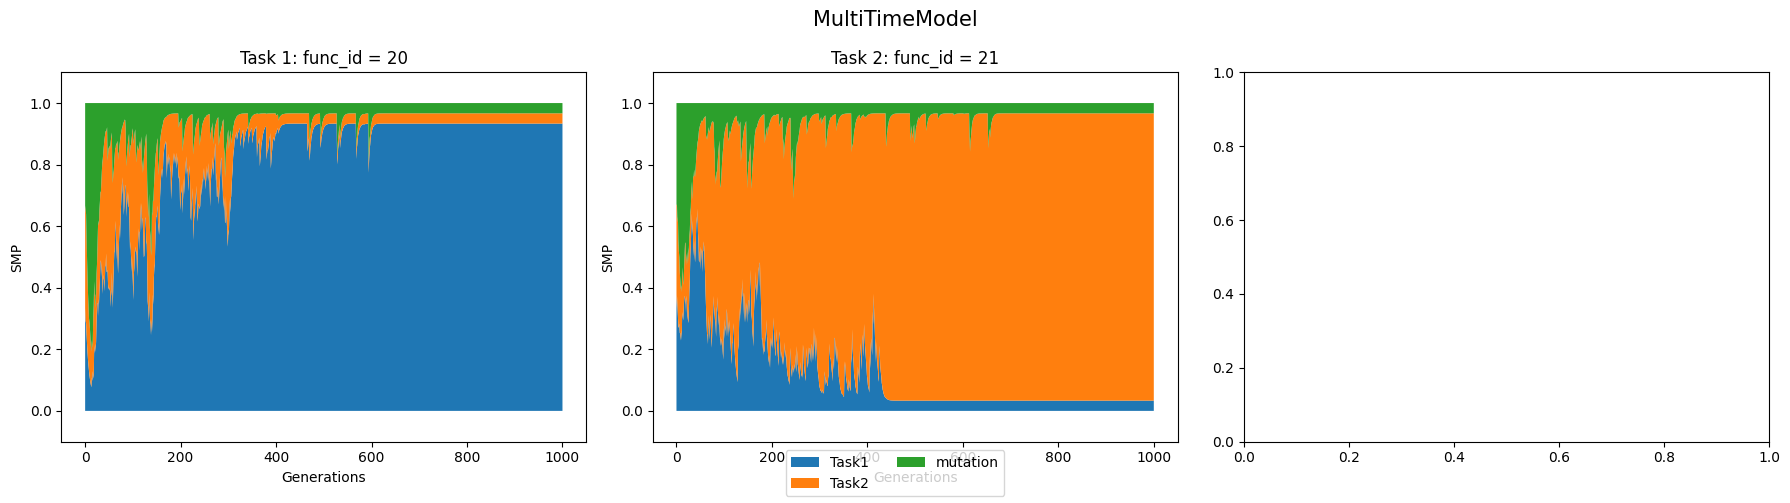

In [7]:
SMP_v2 = loadModel('./RESULTS/result/0.mso', ls_tasks= t)
SMP_v2.render_smp()

##### cec17

In [ ]:
SMP_newSBX.history_cost[-1]

array([5.10323586e-26, 4.76598204e-27, 0.00000000e+00, 0.00000000e+00,
       5.86800309e-16, 2.99316127e-14, 0.00000000e+00, 6.36378325e-04,
       0.00000000e+00, 0.00000000e+00])

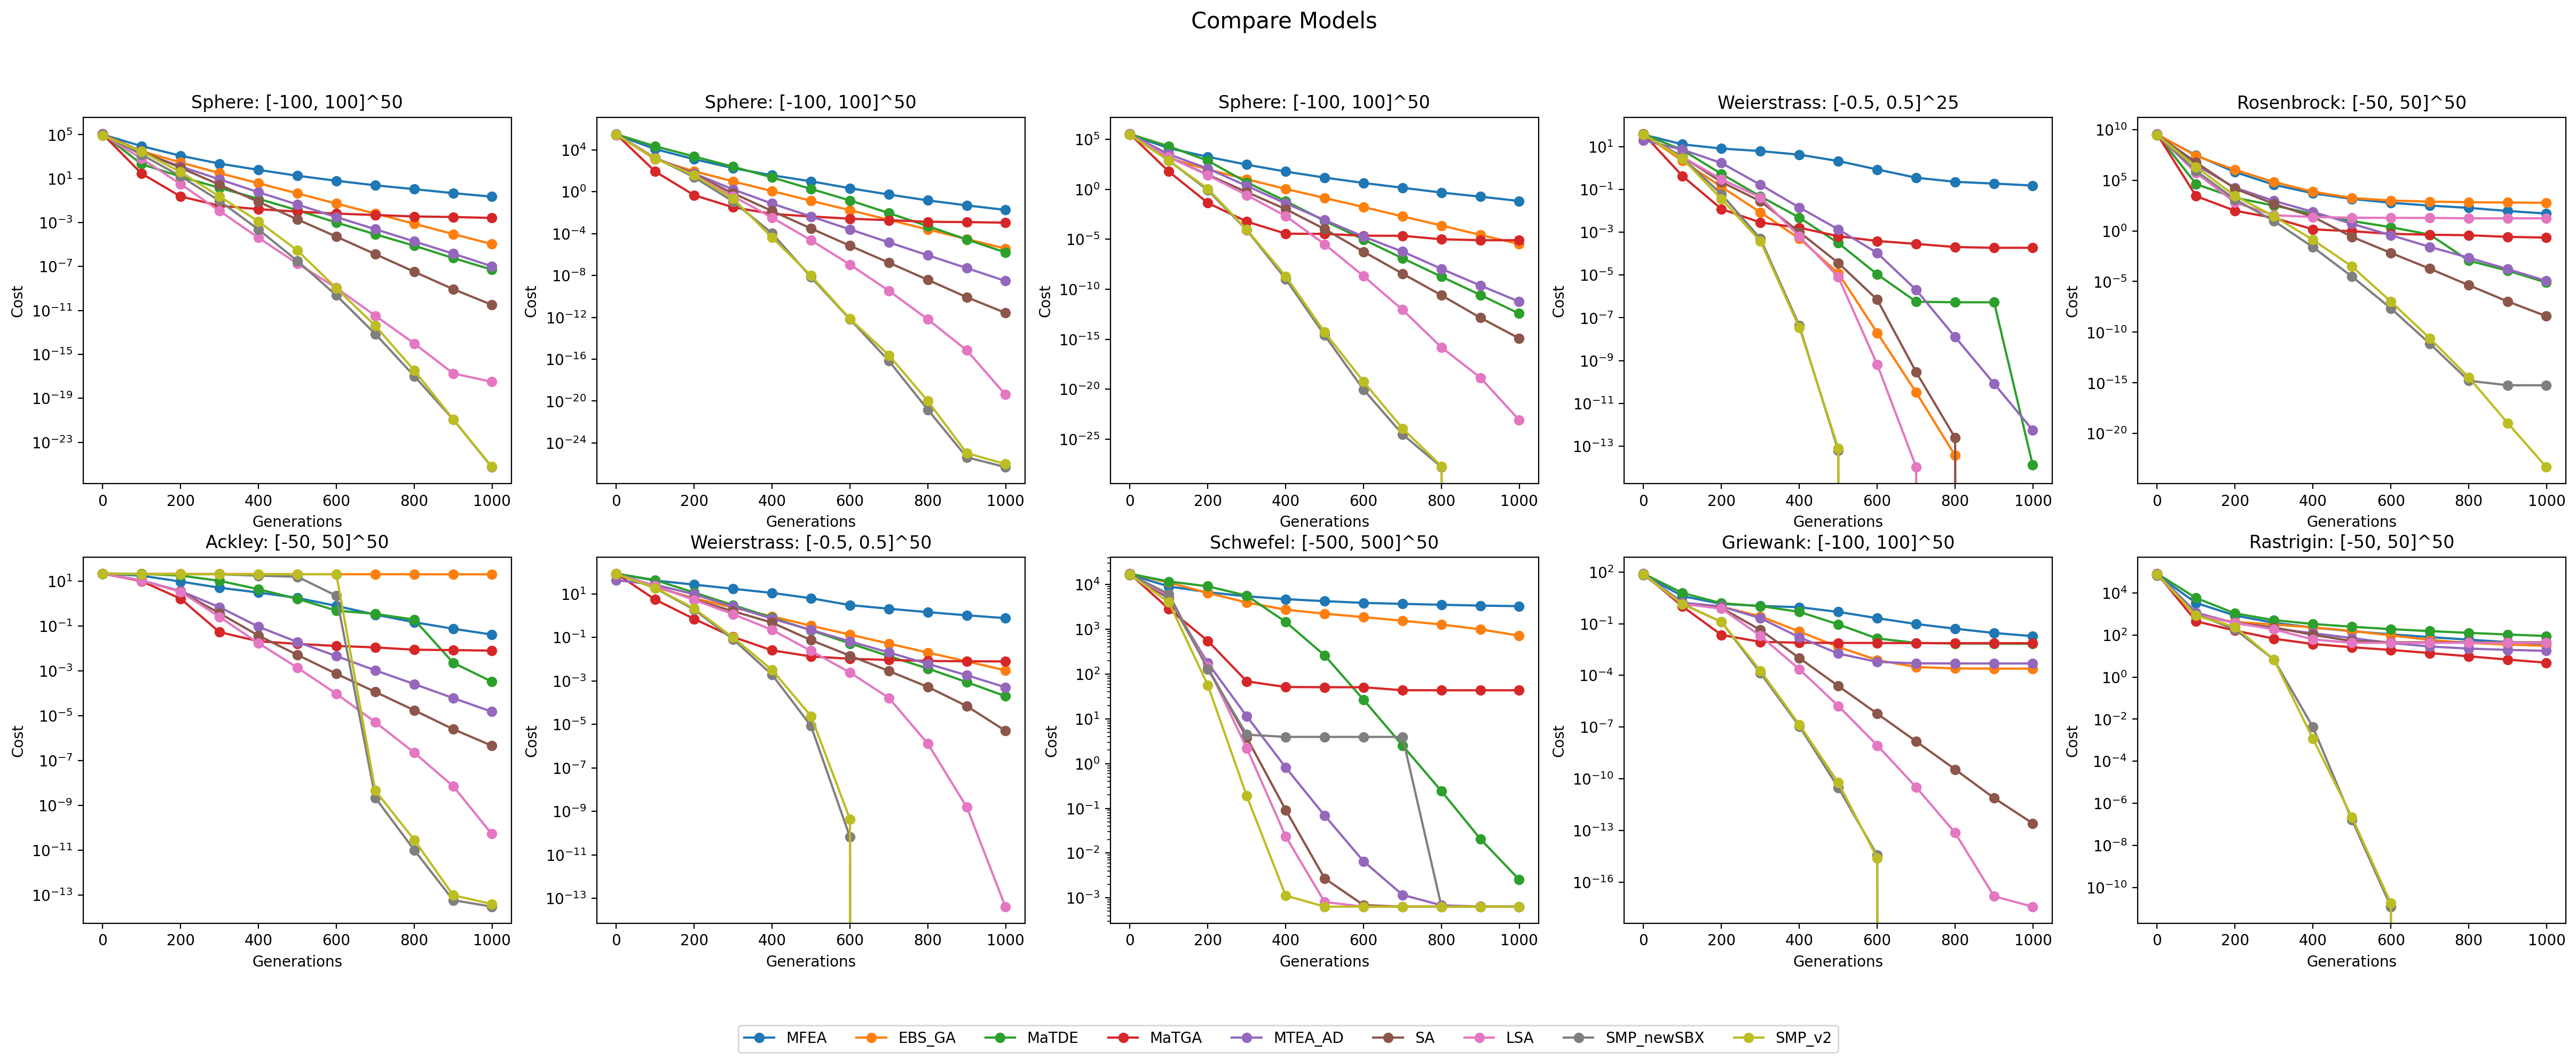

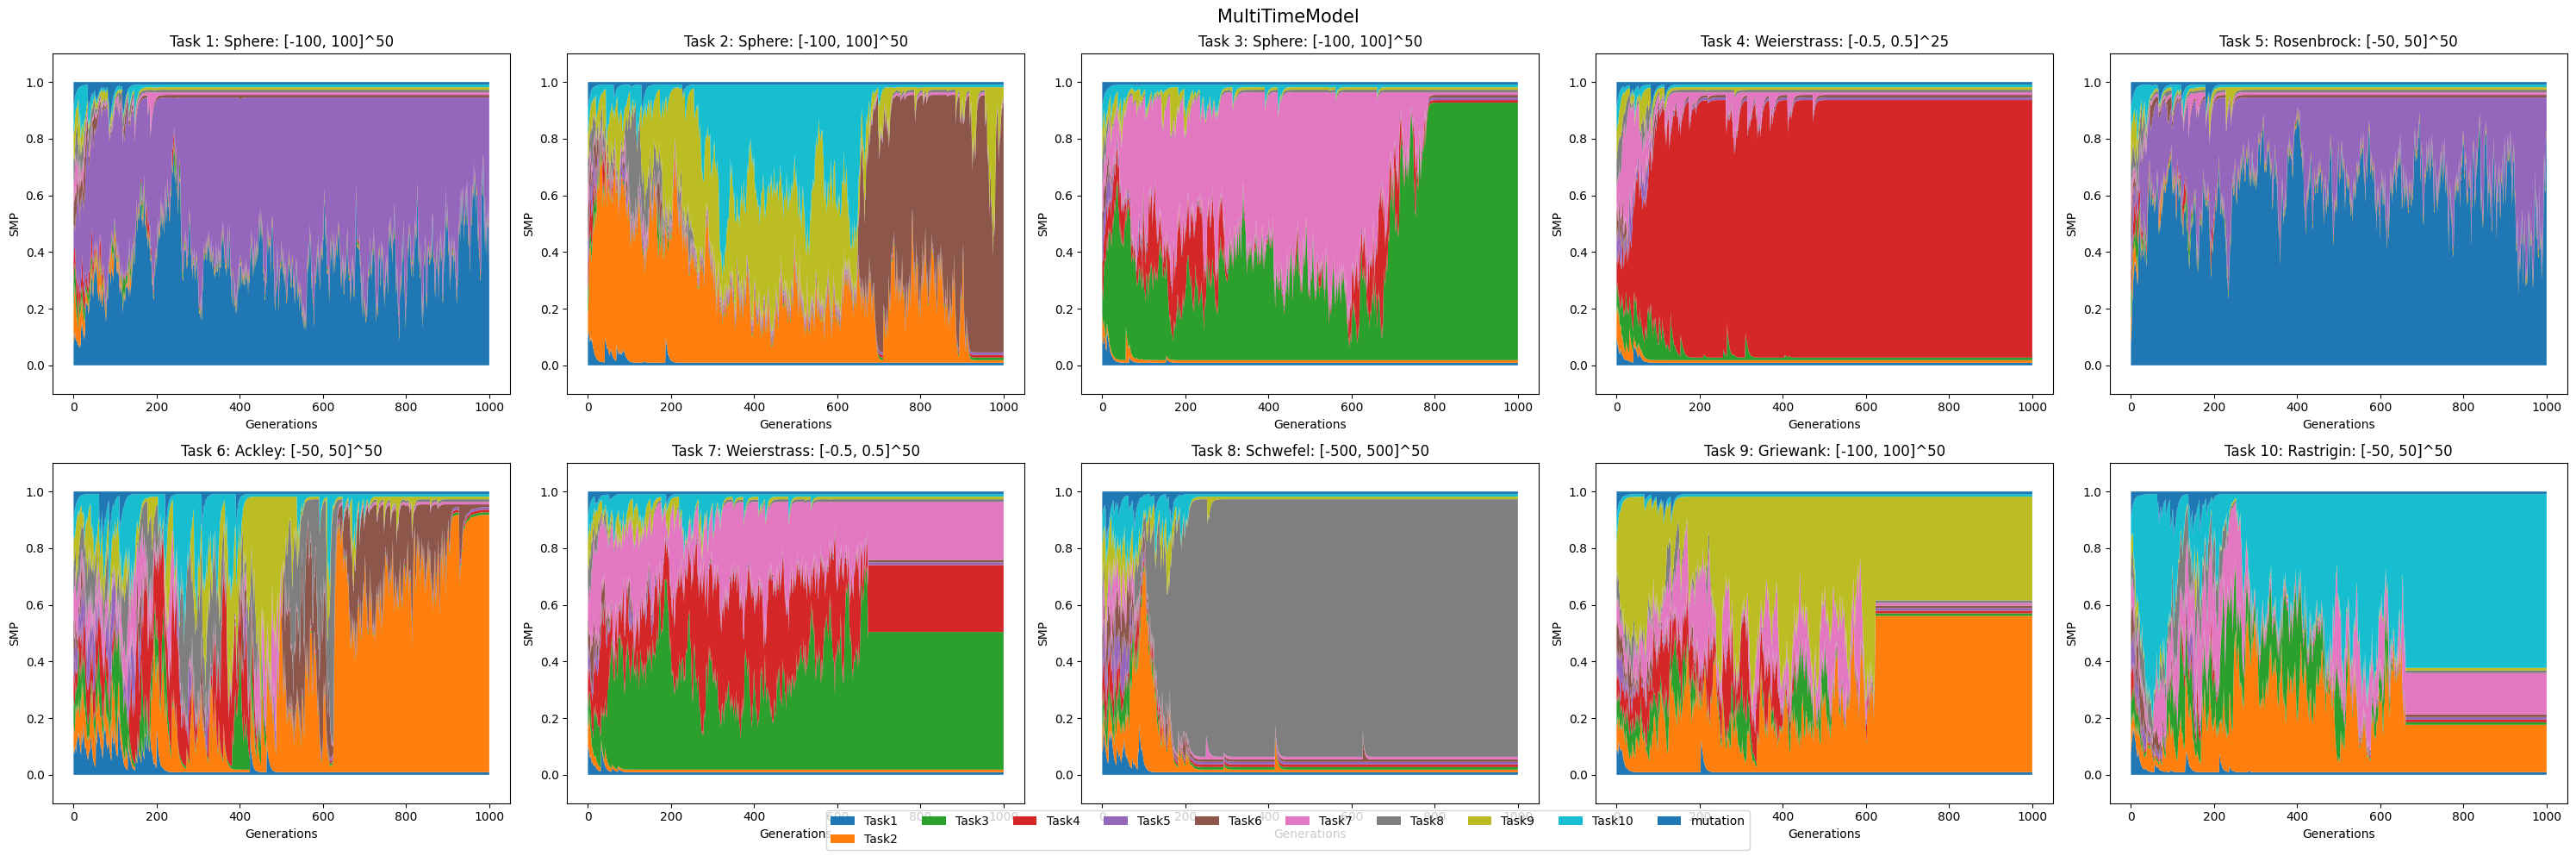

In [5]:
t, ic = CEC17_benchmark.get_10tasks_benchmark()

MFEA_model = loadModel('./RESULTS/__static__/CEC17_10tasks/MFEA_cec17.mso', ls_tasks= t)
EBS_GA_model = loadModel('./RESULTS/__static__/CEC17_10tasks/EBS_GA_cec17.mso', ls_tasks= t)
MaTDE_model = loadModel('./RESULTS/__static__/CEC17_10tasks/MaTDE_cec17.mso', ls_tasks= t)
MaTGA_model = loadModel('./RESULTS/__static__/CEC17_10tasks/MaTGA_cec17.mso', ls_tasks= t)
MTEA_AD_model = loadModel('./RESULTS/__static__/CEC17_10tasks/MTEA_AD_cec17.mso', ls_tasks= t)
SA_model = loadModel('./RESULTS/__static__/CEC17_10tasks/SA_cec17.mso', ls_tasks= t)
LSA_model = loadModel('./RESULTS/__static__/CEC17_10tasks/LSA_cec17.mso', ls_tasks= t)
SMP_newSBX = loadModel('./RESULTS/__static__/CEC17_10tasks/SMP_NEWSBX.mso', ls_tasks= t)
SMP_v2 = loadModel('./RESULTS/result/cec17.mso', ls_tasks= t)

compare = CompareModel(
    models = [MFEA_model, EBS_GA_model, MaTDE_model, MaTGA_model, MTEA_AD_model, SA_model, LSA_model, SMP_newSBX, SMP_v2],
    label= [...] * 7 + ['SMP_newSBX', 'SMP_v2'],
)
compare.render(    
    shape = (2, 5),
    min_cost= 0,
    step= 100,
    yscale= 'log'
)

# SMP_newSBX.render_smp(shape= (3, 5), step = 1)
SMP_v2.render_smp(shape= (2, 5), step = 1)
print()

30 times

In [ ]:
# smpModel = MultiTimeModel(model= SMP_MFEA)
# smpModel.compile(
#     tasks= cec17_10tasks,
#     crossover= newSBX(nc = 2, gamma= 0.4, alpha = 6),
#     # mutation= NoMutation(),
#     mutation = GMMScale(alpha = 3, lenMem= 20, default_scale= 0.5),
#     selection= ElitismSelection(random_percent= 0.),
# )
# smpModel.fit(
#     nb_generations= 10, nb_inds_each_task= 100, nb_inds_min= 20,
#     lr = 1.5, p_const_intra= 0.3, p_mutate= 0.,
#     nb_epochs_stop= 50, 
#     evaluate_initial_skillFactor= True
# )
# smpModel.run(
#     nb_run= 30,
#     save_path= './RESULTS/smpMFEA_cec17.mso'
# )

In [ ]:
# smpModel.render_history(shape = (2, 5), yscale= 'log')
# print()

In [ ]:
# smpModel.render_smp(step = 1, get_host= True)
# print()

##### GECCO20

In [ ]:
# gecco20 = GECCO20_benchmark_50tasks.get_items(ID = 1)
# smpModel = SMP_MFEA.model(seed = 0)
# smpModel.compile(
#     tasks= gecco20,
#     # crossover= SBX_Crossover(nc = 2),
#     crossover= newSBX(nc = 2, gamma= 0.4, alpha = 6),
#     mutation = GaussMutation(scale = 0.1),
#     selection= ElitismSelection(random_percent= 0.),
#     search= SHADE()
# )
# smpModel.fit(
#     nb_generations= 1000, nb_inds_each_task= 100, nb_inds_min= 20,
#     lr = 2, p_const_intra= 0.2, p_mutate= 0., prob_search = 0.,
#     nb_epochs_stop= 1000, swap_po= True,
#     evaluate_initial_skillFactor= True
# )

Time: 20m 41.22s  100 % [====================>]  Pop_size: 9.50E+02  ,  Cost: 2.96E-08  1.04E-15  1.96E-13  4.74E-15  8.37E-14  1.22E-17  1.51E-12  2.06E-14  1.10E-16  2.41E-11  3.00E-10  1.04E-10  1.57E-12  8.09E-12  8.21E-14  1.01E-17  3.89E-13  8.90E-15  6.87E-18  4.38E-13  4.78E-14  3.31E-14  1.82E-09  9.04E-20  7.33E-12  4.88E-14  3.61E-10  1.20E-13  2.29E-13  1.23E-16  6.12E-12  2.37E-18  5.24E-06  6.58E-15  2.25E-09  1.54E-12  3.31E-15  7.99E-09  9.22E-11  7.14E-18  7.08E-12  5.25E-16  1.26E-15  1.58E-14  5.15E-11  2.12E-08  2.56E-12  7.14E-11  9.59E-12  6.66E-16  ,  
[0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02
 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02
 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02
 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02]
[100052. 100052.  99858. 100710.  99180. 100688. 100044. 100176. 100852.
  99570.  99702.  99438. 100032.  99672.  99222.  99858.  99774.  99532.
 100750. 100384. 

[Genes: [0.4768405  0.47898709 0.45361217 0.53745116 0.53275561 0.46100577
  0.4720714  0.51911146 0.45590623 0.49587344 0.48763147 0.53567874
  0.45918167 0.52539007 0.53997309 0.47726749 0.47079102 0.53857954
  0.51324704 0.54622301 0.49738286 0.54633009 0.51746669 0.49063813
  0.51097941 0.53644606 0.45669034 0.5291141  0.49227189 0.49532581
  0.50022179 0.51297085 0.47245222 0.50157283 0.51719764 0.51878919
  0.54242686 0.46554257 0.48777849 0.48304146 0.49829167 0.53597508
  0.49782142 0.49634934 0.49252216 0.50897439 0.50020254 0.46736315
  0.49019355 0.48679407]
 Skill_factor: 0,
 Genes: [0.48127757 0.50134905 0.45237315 0.50661277 0.48475843 0.53756236
  0.4983359  0.52262941 0.45238476 0.50675483 0.49915251 0.54574627
  0.53761728 0.47451531 0.47964602 0.52766296 0.52361396 0.49017616
  0.50055678 0.50819237 0.52657185 0.53225982 0.50072571 0.54337457
  0.49734408 0.52530457 0.49227207 0.50005304 0.50764186 0.49516845
  0.52455583 0.54005983 0.50346593 0.52823774 0.50662212 0.